In [ ]:
from sklearn.cluster import  KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/people_income_dataset.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


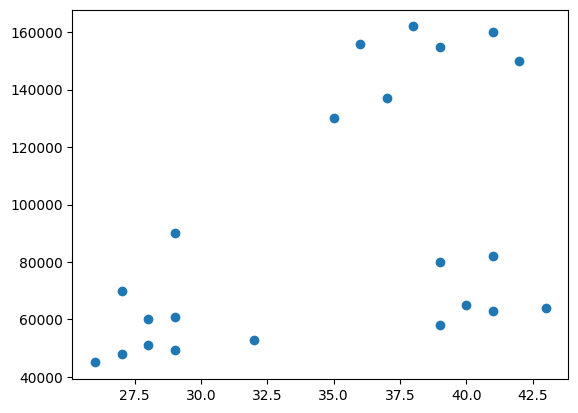

In [ ]:
plt.scatter(df['Age'],df['Income($)'])

In [ ]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2],
      dtype=int32)

/tmp/ipython-input-13-3534618942.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


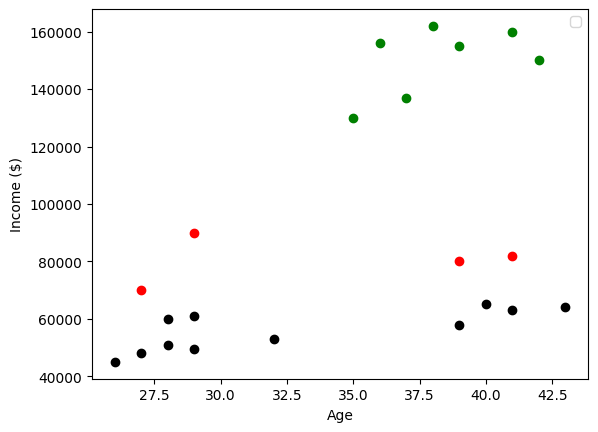

In [ ]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()


In [ ]:
#here in above the red and black clusters cannot group properly

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df.Age.values.reshape(-1, 1))
df.Age = scaler.transform(df.Age.values.reshape(-1, 1))

df


,Name,Age,Income($),cluter,cluster
0,Rob,0.058824,0.213675,1,1
1,Michael,0.176471,0.384615,1,1
2,Mohan,0.176471,0.136752,2,2
3,Ismail,0.117647,0.128205,2,2
4,Kory,0.941176,0.897436,0,0
5,Gautam,0.764706,0.940171,0,0
6,David,0.882353,0.982906,0,0
7,Andrea,0.705882,1.000000,0,0
8,Brad,0.588235,0.948718,0,0
9,Angelina,0.529412,0.726496,0,0


In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

# Add predicted cluster to DataFrame
df['cluster'] = y_predicted

# Drop misspelled 'cluter' column if it exists
df.drop('cluter', axis='columns', inplace=True)

df


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [ ]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

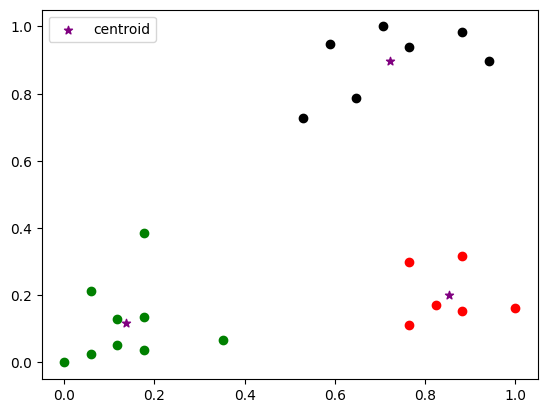

In [ ]:
# Separate data by clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Plot scatter plots for each cluster
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

# Plot centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            color='purple', marker='*', label='centroid')

# Show legend
plt.legend()


now I get correct clusters

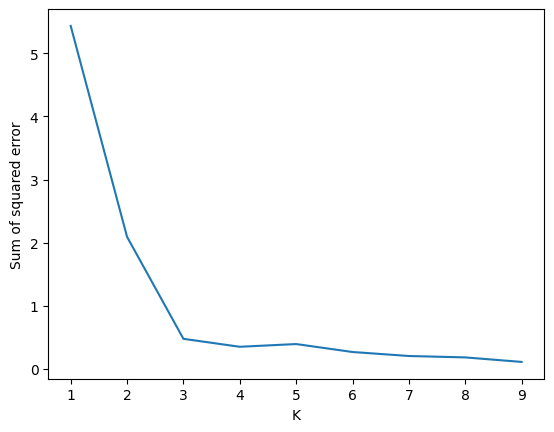

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal k
k_rng = range(1, 10)
sse = []  # sum of squared errors

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

# Display SSE values
sse

# Plot the elbow graph
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)


Naive bayes

In [ ]:
df=pd.read_csv('/content/titanic_sample.csv')
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,"Moran, Mr. James",3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,"McCarthy, Mr. Timothy J",1,male,54.0,0,0,17463,51.8625,E46,S,1
7,8,"Palsson, Master. Gosta Leonard",3,male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,"Johnson, Mrs. Oscar",3,female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,"Nasser, Mrs. Nicholas",2,female,14.0,1,0,237736,30.0708,NaN,C,1


In [ ]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [ ]:
target = df.Survived
inputs = df.drop('Survived', axis='columns')

In [ ]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [ ]:
inputs = pd.concat([inputs, dummies], axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False


In [ ]:
inputs.drop('Sex', axis='columns', inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False


In [ ]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
inputs.Age[:10]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(6)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True
5,3,28.0,8.4583,False,True


In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)


In [ ]:
len(X_train)

15

In [ ]:
len(X_test)

4

In [ ]:
len(inputs)

19

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
y_test[:10]

,Survived
1,1
7,0
3,1
12,0


In [ ]:
model.predict(X_test[:10])

array([1, 0, 1, 0])

In [ ]:
model.predict_proba(X_test[:10])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

Email spam or not


In [ ]:
df=pd.read_csv('/content/sms_spam_sample.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,spam,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,ham,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham           12     12  Go until jurong point, crazy.. Available only ...    1
spam           8      8  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [ ]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0) # ham gets 0 and spam gets 1
df.head()

,Category,Message,head,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam, test_size=0.25)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the model
model = MultinomialNB()


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text data to numerical features using CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_test_count = v.transform(X_test.values)

# Train the model using the vectorized data
model.fit(X_train_count, y_train)

MultinomialNB()

In [64]:
# Predict on the test data
y_pred = model.predict(X_test_count)
print(y_pred)

[0 1 1 1 1]


In [65]:
# Calculate the accuracy score
score = model.score(X_test_count, y_test)
print(score)

0.4
